# Implemenatation of Decision Trees Classification Machine Learning Algorithm

### Basic Implementation

In [12]:
# importing required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# importing the dataset

iris=sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [6]:
# splitting data into independent and dependent features

X=iris.drop(columns=['species'], axis=1)
y=iris['species']

In [7]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [8]:
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [9]:
# splitting our data into training and testing splits

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

In [10]:
X_train.shape, X_test.shape

((112, 4), (38, 4))

In [14]:
# creating the Decision Trees Classifier Model and fiiting it to the training data

from sklearn.tree import DecisionTreeClassifier
treeclassifier=DecisionTreeClassifier()
treeclassifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [18]:
# making Predictions and checking metrics

y_pred=treeclassifier.predict(X_test)

from sklearn.metrics import confusion_matrix, classification_report
print(f"Confusion Matrix:\n{confusion_matrix(y_test,y_pred)}\nClassification Report:\n{classification_report(y_test, y_pred)}")

Confusion Matrix:
[[15  0  0]
 [ 0 10  2]
 [ 0  0 11]]
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      0.83      0.91        12
   virginica       0.85      1.00      0.92        11

    accuracy                           0.95        38
   macro avg       0.95      0.94      0.94        38
weighted avg       0.96      0.95      0.95        38



[Text(0.4, 0.9285714285714286, 'x[3] <= 0.8\ngini = 0.666\nsamples = 112\nvalue = [35, 38, 39]'),
 Text(0.3, 0.7857142857142857, 'gini = 0.0\nsamples = 35\nvalue = [35, 0, 0]'),
 Text(0.35, 0.8571428571428572, 'True  '),
 Text(0.5, 0.7857142857142857, 'x[2] <= 4.85\ngini = 0.5\nsamples = 77\nvalue = [0.0, 38.0, 39.0]'),
 Text(0.45, 0.8571428571428572, '  False'),
 Text(0.2, 0.6428571428571429, 'x[3] <= 1.65\ngini = 0.1\nsamples = 38\nvalue = [0, 36, 2]'),
 Text(0.1, 0.5, 'gini = 0.0\nsamples = 35\nvalue = [0, 35, 0]'),
 Text(0.3, 0.5, 'x[1] <= 3.1\ngini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(0.2, 0.35714285714285715, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.4, 0.35714285714285715, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.8, 0.6428571428571429, 'x[3] <= 1.7\ngini = 0.097\nsamples = 39\nvalue = [0, 2, 37]'),
 Text(0.7, 0.5, 'x[1] <= 3.05\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.6, 0.35714285714285715, 'x[3] <= 1.55\ngini = 0.32\nsampl

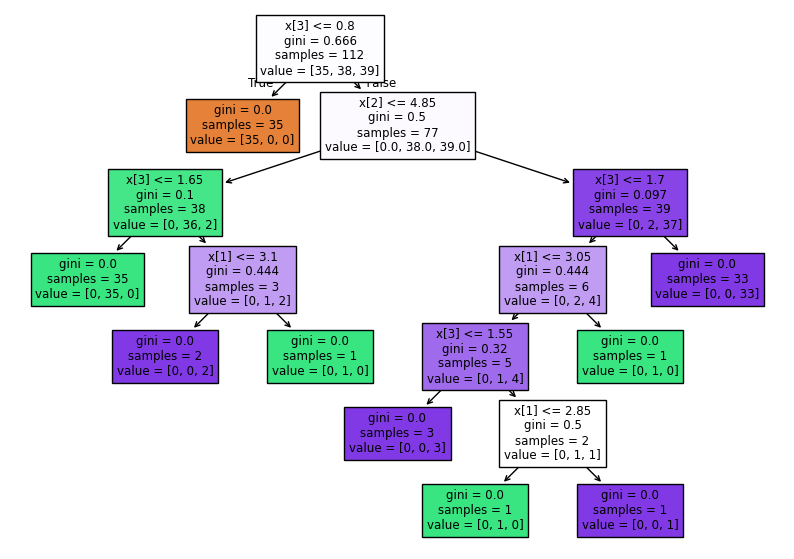

In [16]:
# visualizing our Decision Tree Classifier Model

from sklearn import tree

plt.figure(figsize=(10,7))
tree.plot_tree(treeclassifier, filled=True)

Observation: In the above Decison Tree Classifier we can see that after the 2nd depth level, we are able to predict the output. Thus we will post-prune our Decision `Tree to max_depth=2`

### Post-Pruning

In [19]:
# creating the Decision Trees Classifier Model and fiiting it to the training data

from sklearn.tree import DecisionTreeClassifier
treeclassifier_2=DecisionTreeClassifier(max_depth=2)
treeclassifier_2.fit(X_train, y_train)

# making Predictions and checking metrics

y_pred=treeclassifier_2.predict(X_test)

from sklearn.metrics import confusion_matrix, classification_report
print(f"Confusion Matrix:\n{confusion_matrix(y_test,y_pred)}\nClassification Report:\n{classification_report(y_test, y_pred)}")

Confusion Matrix:
[[15  0  0]
 [ 0 10  2]
 [ 0  1 10]]
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.91      0.83      0.87        12
   virginica       0.83      0.91      0.87        11

    accuracy                           0.92        38
   macro avg       0.91      0.91      0.91        38
weighted avg       0.92      0.92      0.92        38



[Text(0.4, 0.8333333333333334, 'x[3] <= 0.8\ngini = 0.666\nsamples = 112\nvalue = [35, 38, 39]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 35\nvalue = [35, 0, 0]'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'x[2] <= 4.85\ngini = 0.5\nsamples = 77\nvalue = [0.0, 38.0, 39.0]'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'gini = 0.1\nsamples = 38\nvalue = [0, 36, 2]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.097\nsamples = 39\nvalue = [0, 2, 37]')]

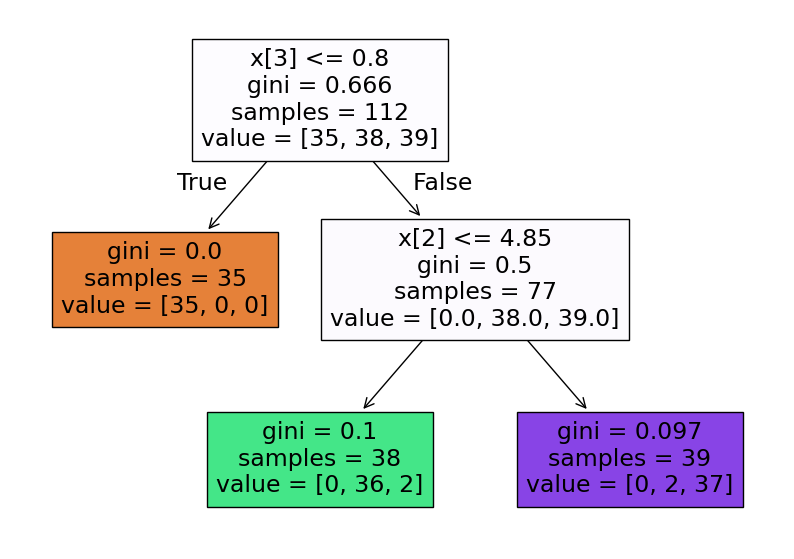

In [20]:
# visualizing our 2nd Decision Tree Classifier Model

from sklearn import tree

plt.figure(figsize=(10,7))
tree.plot_tree(treeclassifier_2, filled=True)

### Pre-Pruning + Hyper-Parameter Tuning

In [23]:
# Hyper-parameter Tuning & PrePruning

params={
    'criterion':['gini', 'entropy', 'log_loss'],
    'splitter':['best', 'random'],
    'max_depth':[1,2,3,4,5],
    'max_features':['sqrt','log2']
}

In [24]:
params

{'criterion': ['gini', 'entropy', 'log_loss'],
 'splitter': ['best', 'random'],
 'max_depth': [1, 2, 3, 4, 5],
 'max_features': ['sqrt', 'log2']}

In [25]:
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(treeclassifier, param_grid=params, cv=5, scoring='accuracy')

In [26]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [27]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'sqrt',
 'splitter': 'random'}

In [28]:
grid.best_score_

np.float64(0.9644268774703558)

In [32]:
y_pred=treeclassifier.predict(X_test)

from sklearn.metrics import confusion_matrix, classification_report
print(f"Confusion Matrix:\n{confusion_matrix(y_test,y_pred)}\nClassification Report:\n{classification_report(y_test, y_pred)}")

Confusion Matrix:
[[15  0  0]
 [ 0 10  2]
 [ 0  0 11]]
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      0.83      0.91        12
   virginica       0.85      1.00      0.92        11

    accuracy                           0.95        38
   macro avg       0.95      0.94      0.94        38
weighted avg       0.96      0.95      0.95        38



### Best Params Model

In [29]:
# training a model based on best params:

best_tree=DecisionTreeClassifier(criterion='gini', max_depth=5, max_features='sqrt', splitter='random')
best_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, max_features='sqrt', splitter='random')

In [30]:
y_bestpred=best_tree.predict(X_test)

In [31]:
from sklearn.metrics import confusion_matrix, classification_report
print(f"Confusion Matrix:\n{confusion_matrix(y_test,y_bestpred)}\nClassification Report:\n{classification_report(y_test, y_bestpred)}")

Confusion Matrix:
[[15  0  0]
 [ 0 11  1]
 [ 0  2  9]]
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.85      0.92      0.88        12
   virginica       0.90      0.82      0.86        11

    accuracy                           0.92        38
   macro avg       0.92      0.91      0.91        38
weighted avg       0.92      0.92      0.92        38

